In [2]:
import numpy as np 
import pandas as pd 
import os
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables import Keypoint, KeypointsOnImage

from sklearn.model_selection import train_test_split 
from matplotlib import pyplot as plt
%matplotlib inline 

for dirname, _, filenames in os.walk('drive/My Drive/facial_keypoints_data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

drive/My Drive/facial_keypoints_data/IdLookupTable.csv
drive/My Drive/facial_keypoints_data/SampleSubmission.csv
drive/My Drive/facial_keypoints_data/test/test.csv
drive/My Drive/facial_keypoints_data/training/training.csv


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
training = pd.read_csv('drive/My Drive/facial_keypoints_data/training/training.csv')

In [4]:
training.loc[:, training.columns != 'Image'].head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [0]:
training['Image'].head(3)

0    238 236 237 238 240 240 239 241 241 243 240 23...
1    219 215 204 196 204 211 212 200 180 168 178 19...
2    144 142 159 180 188 188 184 180 167 132 84 59 ...
Name: Image, dtype: object

In [0]:
print(training.head())

   left_eye_center_x  ...                                              Image
0          66.033564  ...  238 236 237 238 240 240 239 241 241 243 240 23...
1          64.332936  ...  219 215 204 196 204 211 212 200 180 168 178 19...
2          65.057053  ...  144 142 159 180 188 188 184 180 167 132 84 59 ...
3          65.225739  ...  193 192 193 194 194 194 193 192 168 111 50 12 ...
4          66.725301  ...  147 148 160 196 215 214 216 217 219 220 206 18...

[5 rows x 31 columns]


In [0]:
df_imgs = training.dropna()
df_imgs = training.sample(500).copy()
df_imgs['Image'] = df_imgs['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))


In [0]:


# scale pixel values to [0, 1]
X = df_imgs['Image'].values
# X = X.astype(np.float32)

y = df_imgs[df_imgs.columns[:-1]].values
# y = (y - 48) / 48  # scale target coordinates to [-1, 1]
y = y.astype(np.float32)


In [89]:
XX = X.copy()

from skimage import img_as_ubyte


print(XX.dtype)
print(XX[0].dtype)

object
int64


In [0]:
for i, t in enumerate(X):
  for j, tt in enumerate(X[i]):
    for k, ttt in enumerate(X[i][j]):
      XX[i][j][k] = X[i][j][k].astype(np.uint8)
    XX[i][j] = img_as_ubyte(X[i][j])
  XX[i] = img_as_ubyte(X[i])

In [102]:
print(XX[0])
print(XX[0].shape)

[[ 95  95  95 ...  99  98  95]
 [ 97  97  97 ...  99  97  95]
 [100 101 100 ...  98  97  94]
 ...
 [ 89  89  89 ...  91  89  89]
 [ 89  89  89 ...  89  91  91]
 [ 89  89  89 ...  89  91  91]]
(96, 96)


In [31]:
quok = ia.quokka(size=(96, 96))
print(type(quok[1][0][1]))

<class 'numpy.uint8'>


In [0]:

ia.seed(1)

imgs_aug = []
kpss_aug = []

for j, (image, keypt) in enumerate(zip(XX,y)):
  # print(keypt)
  img = XX[j]
  kps = KeypointsOnImage([
    Keypoint(keypt[0], keypt[1]),
    Keypoint(keypt[2], keypt[3]),
    Keypoint(keypt[4], keypt[5]),
    Keypoint(keypt[6], keypt[7]),
    Keypoint(keypt[8], keypt[9]),
    Keypoint(keypt[10], keypt[11]),
    Keypoint(keypt[12], keypt[13]),
    Keypoint(keypt[14], keypt[15]),
    Keypoint(keypt[16], keypt[17]),
    Keypoint(keypt[18], keypt[19]),
    Keypoint(keypt[20], keypt[21]),
    Keypoint(keypt[22], keypt[23]),
    Keypoint(keypt[24], keypt[25]),
    Keypoint(keypt[26], keypt[27]),
    Keypoint(keypt[28], keypt[29])],
    shape = (96,96))


  seq = iaa.Sequential([
      iaa.Fliplr(1.0)
  ])
  img_aug, kps_aug = seq(image=img, keypoints=kps)
  act_kps = []
  act_img = []
  for i in range(len(kps.keypoints)):
    act_kps.append(kps_aug.keypoints[i].x)
    act_kps.append(kps_aug.keypoints[i].y)
  imgs_aug.append(img_aug)
  kpss_aug.append(act_kps)

# print coordinates before/after augmentation (see below)
# use after.x_int and after.y_int to get rounded integer coordinates
# for i in range(len(kps.keypoints)):
#     before = kps.keypoints[i]
#     after = kps_aug.keypoints[i]
#     print("Keypoint %d: (%.8f, %.8f) -> (%.8f, %.8f)" % (
#         i, before.x, before.y, after.x, after.y)
#     )


# image with keypoints before/after augmentation (shown below)
# image_before = kps.draw_on_image(df_imgs[0], size=7)
# image_after = kps_aug.draw_on_image(image_aug, size=7)

In [147]:
img_arr == X

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [148]:
y == key_arr

array([[False,  True, False, ..., False, False,  True],
       [False,  True, False, ...,  True, False,  True],
       [False,  True, False, ...,  True, False,  True],
       ...,
       [False,  True, False, ..., False, False,  True],
       [False,  True, False, ..., False, False,  True],
       [False,  True, False, ..., False, False,  True]])

In [0]:
def get_image_and_dots(index):
    image = plt.imshow(img_arr[index],cmap='gray')
    l = []
    for i in range(1,31,2):
        l.append(plt.plot(key_arr[index][i-1], key_arr[index][i], 'ro'))
        
    return image, l

def plot_faces(plot_dim = 6):
  fig = plt.figure(figsize=(12, 12))
  fig.subplots_adjust(
      left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

  for i in range(plot_dim*plot_dim):
      ax = fig.add_subplot(plot_dim, plot_dim, i + 1, xticks=[], yticks=[])
      get_image_and_dots(i)

  plt.show()

In [0]:
def get_image_and_dots2(index):
    image = plt.imshow(X[index],cmap='gray')
    l = []
    for i in range(1,31,2):
        l.append(plt.plot(y[index][i-1], y[index][i], 'ro'))
        
    return image, l

def plot_faces2(plot_dim = 6):
  fig = plt.figure(figsize=(12, 12))
  fig.subplots_adjust(
      left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

  for i in range(plot_dim*plot_dim):
      ax = fig.add_subplot(plot_dim, plot_dim, i + 1, xticks=[], yticks=[])
      get_image_and_dots(i)

  plt.show()

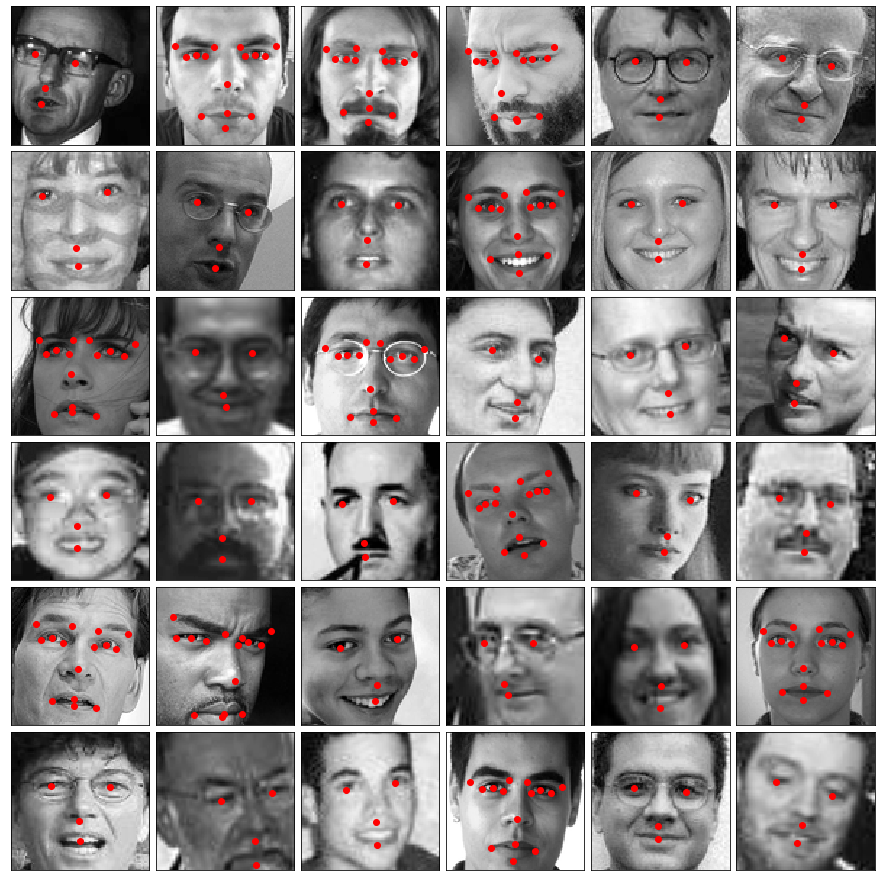

In [146]:
plot_faces()

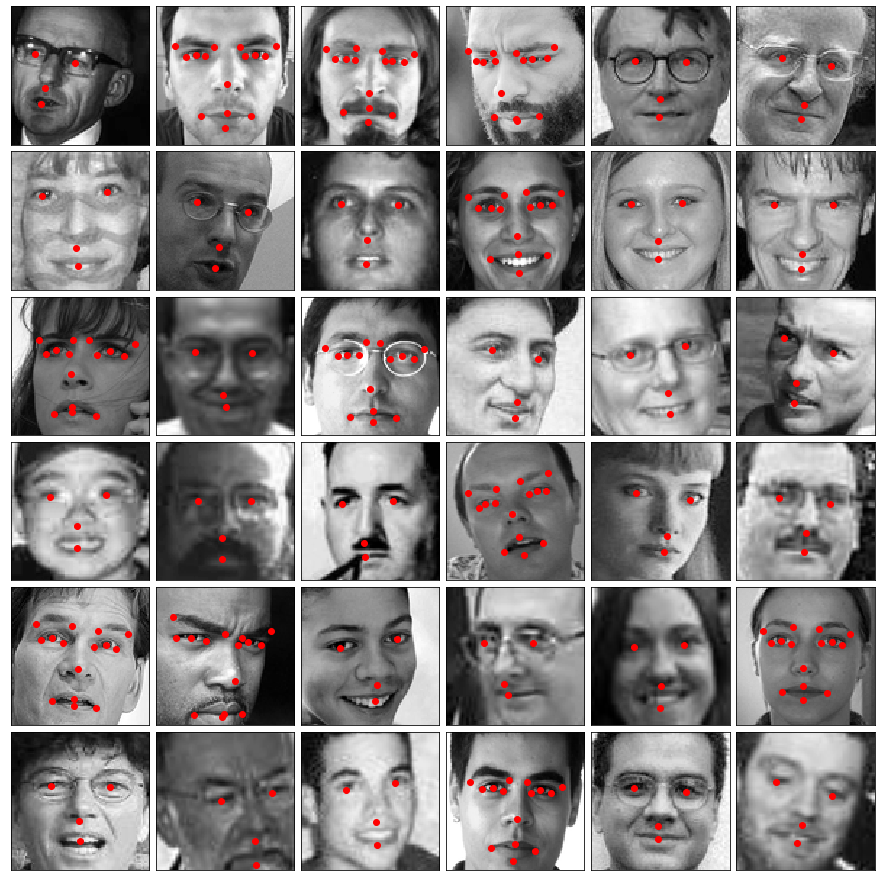

In [145]:
plot_faces2()